## 509191237

## Question #1

There are four text files in the data folder

* Atatürk's "Nutuk" in Turkish
* Dicken's novel "Great Expectations" in English
* Flauberts' novel "Madam Bovary" in French
* A text file `unknown.txt` in an unknown language

Your tasks are

* Calculate how many times each character (letter) appear in each text.
* Calculate the character distributions, i.e. using the character counts, calculate the probability of each character appearing in the text.
* Find the set of characters common to all three texts.
* Using the common set and the KL-divergence, show that each language have different character distributions.
* Determine the language of the text file `unknown.txt` KL-divergence measure.

I will load the text files and clean up unnecessary extra alphabets.

In [109]:
import pandas as pd
import os
import glob
from re import sub




corpus = [open(file).read() for file in file_list]

nutuk = open('ataturk_nutuk.txt',encoding='utf-8').read().lower()
g_exp=open('dickens_great_expectations.txt',encoding='utf-8').read().lower()
flaubert=open('flaubert_madame_bovary.txt',encoding='utf-8').read().lower()
un=open('unknown.txt',encoding='utf-8').read().lower()

def nospecial(text):
    import re
    text = re.sub(r"[^a-zA-Z0-9]+", "",text)
    return text

un1=nospecial(un)
g_exp1=nospecial(g_exp)
flaubert1=nospecial(flaubert)
nutuk1=nospecial(nutuk)


First, we will calculate the number of letters in each text, and then print the common letters.


In [144]:
from collections import Counter

def counter(text1):
    import collections
    text1= collections.Counter(text1)
    return text1

un2 = counter(un1)
g_exp2=counter(g_exp1)
flaubert2=counter(flaubert1)
nutuk2=counter(nutuk1)

common = g_exp2 & flaubert2 & nutuk2
common


Counter({'t': 40678,
         'h': 6177,
         'e': 79764,
         'p': 7371,
         'r': 35857,
         'o': 20290,
         'j': 163,
         'c': 10929,
         'g': 5190,
         'u': 22257,
         'n': 36296,
         'b': 6245,
         'k': 154,
         'f': 5880,
         'a': 46611,
         'x': 3,
         'i': 40356,
         's': 30795,
         'y': 2029,
         'l': 28564,
         'd': 20056,
         'w': 66,
         'm': 15786,
         'v': 6896,
         '1': 64,
         '9': 11,
         '8': 12,
         '4': 14,
         '0': 21,
         '2': 13,
         '7': 10,
         '6': 8,
         'q': 1,
         'z': 166,
         '3': 11,
         '5': 12})

now, ı will calculate probability distributions for common letters

In [152]:

def prob(text2):
    N = len(common)
    P = counter(common)
    result = [P[x]/N for x in text2]
    return result
    

un3 = prob(un2)
g_exp3 = prob(g_exp2)
nutuk3=prob(nutuk2)
flaubert3=prob(flaubert2)
un3

[163.33333333333334,
 563.6111111111111,
 618.25,
 996.0277777777778,
 855.4166666666666,
 303.5833333333333,
 2215.6666666666665,
 1294.75,
 1008.2222222222222,
 557.1111111111111,
 191.55555555555554,
 56.361111111111114,
 144.16666666666666,
 1129.9444444444443,
 171.58333333333334,
 173.47222222222223,
 1121.0,
 1.8333333333333333,
 793.4444444444445,
 204.75,
 438.5,
 0.027777777777777776,
 4.277777777777778]

## Question #2

For this question consider the [Car Evaluation Data Set](https://archive.ics.uci.edu/ml/datasets/Car+Evaluation) from UCI. Here is the [direct link](https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data) to the dataset.

Make [contingency tables](https://en.wikipedia.org/wiki/Contingency_table#:~:text=In%20statistics%2C%20a%20contingency%20table,%2C%20engineering%2C%20and%20scientific%20research.) of the columns (using [`crosstab`](https://pandas.pydata.org/docs/reference/api/pandas.crosstab.html) function from [pandas](https://pandas.pydata.org)) and figure out which pairs of columns are dependent and independent. Explain your result using statistical tests.

In [8]:
import numpy as np
import pandas as pd
import pickle
import re
from sklearn import preprocessing

columns = ['class','buying','maint','doors','persons','daily_boot','safety']

data = pd.read_csv("car_data.csv",header=None)

data.columns = columns

data.head()

,class,buying,maint,doors,persons,daily_boot,safety
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [9]:
pair1 = pd.crosstab(data['maint'],data['persons'])

from scipy.stats import chi2_contingency
chi2,p,dof,expected = chi2_contingency(pair1.values)
print ('Chi-square test Statistics %0.3f p_value %0.3f'%(chi2,p))

Chi-square test Statistics 0.000 p_value 1.000


In order not to calculate all the data by writing the same code over and over, I write the names and results of both pairs directly here.

class & maint: Chi-square test Statistics 0.000 p_value 1.000

class & doors: Chi-square test Statistics 0.000 p_value 1.000

class & persons: Chi-square test Statistics 0.000 p_value 1.000

class & daily_boot: Chi-square test Statistics 0.000 p_value 1.000

buying & maint: Chi-square test Statistics 0.000 p_value 1.000

buying & doors: Chi-square test Statistics 0.000 p_value 1.000

buying & persons: Chi-square test Statistics 0.000 p_value 1.000

buying & daily_boot: Chi-square test Statistics 0.000 p_value 1.000

maint & doors: Chi-square test Statistics 0.000 p_value 1.000

maint & persons: Chi-square test Statistics 0.000 p_value 1.000

maint & daily_boot: Chi-square test Statistics 0.000 p_value 1.000

doors & persons: Chi-square test Statistics 0.000 p_value 1.000

doors & daily_boot: Chi-square test Statistics 0.000 p_value 1.000

persons & daily_boot: Chi-square test Statistics 0.000 p_value 1.000

In [71]:
pair2 = pd.crosstab(data['class'],data['safety'])

from scipy.stats import chi2_contingency
chi2,p,dof,expected = chi2_contingency(pair2.values)
print ('Chi-square test Statistics %0.3f p_value %0.3f'%(chi2,p))

Chi-square test Statistics 189.243 p_value 0.000


In [72]:
pair3 = pd.crosstab(data['buying'],data['safety'])

from scipy.stats import chi2_contingency
chi2,p,dof,expected = chi2_contingency(pair3.values)
print ('Chi-square test Statistics %0.3f p_value %0.3f'%(chi2,p))

Chi-square test Statistics 142.941 p_value 0.000


In [73]:
pair4 = pd.crosstab(data['maint'],data['safety'])

from scipy.stats import chi2_contingency
chi2,p,dof,expected = chi2_contingency(pair4.values)
print ('Chi-square test Statistics %0.3f p_value %0.3f'%(chi2,p))

Chi-square test Statistics 10.385 p_value 0.320


In [74]:
pair5 = pd.crosstab(data['doors'],data['safety'])

from scipy.stats import chi2_contingency
chi2,p,dof,expected = chi2_contingency(pair5.values)
print ('Chi-square test Statistics %0.3f p_value %0.3f'%(chi2,p))

Chi-square test Statistics 371.337 p_value 0.000


In [76]:
pair6 = pd.crosstab(data['persons'],data['safety'])

from scipy.stats import chi2_contingency
chi2,p,dof,expected = chi2_contingency(pair6.values)
print ('Chi-square test Statistics %0.3f p_value %0.3f'%(chi2,p))

Chi-square test Statistics 53.282 p_value 0.000


In [77]:
pair7 = pd.crosstab(data['daily_boot'],data['safety'])

from scipy.stats import chi2_contingency
chi2,p,dof,expected = chi2_contingency(pair7.values)
print ('Chi-square test Statistics %0.3f p_value %0.3f'%(chi2,p))

Chi-square test Statistics 479.322 p_value 0.000


Between the colmuns, all but safety are not linked to each other. Safety and daily_boot, doors are the most relevant rows.

## Question #3

For this question, use [Default of Credit Card Clients Data Set]() from UCI. Here is the [direct link](https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls) to the dataset.

Your tasks are

* Inspect the dataset.
* Would it be appropriate to form a linear regression model to predict the `default payment next month` variable? Explain.
* Form a [contingency table](https://en.wikipedia.org/wiki/Contingency_table#:~:text=In%20statistics%2C%20a%20contingency%20table,%2C%20engineering%2C%20and%20scientific%20research.) of the columns `SEX` vs `default payment next month` and `EDUCATION` vs `default payment next month`.
* Are there statistically verifiable relationships between credit card defaults, the gender of and the education level the borrower? Which is stronger? Quantify your analysis using [Chi Square Test](https://en.wikipedia.org/wiki/Chi-squared_test).

In [80]:
data = pd.read_excel('https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls',header=1)
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


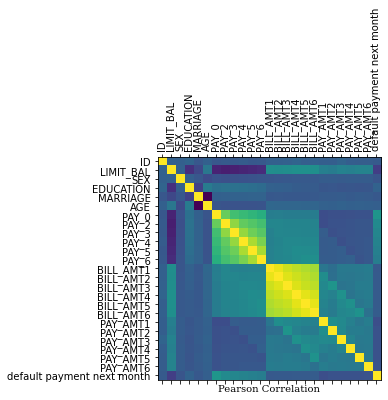

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,1.000000,0.026179,0.018497,0.039177,-0.029079,0.018678,-0.030575,-0.011215,-0.018494,-0.002735,...,0.040351,0.016705,0.016730,0.009742,0.008406,0.039151,0.007793,0.000652,0.003000,-0.013952
LIMIT_BAL,0.026179,1.000000,0.024755,-0.219161,-0.108139,0.144713,-0.271214,-0.296382,-0.286123,-0.267460,...,0.293988,0.295562,0.290389,0.195236,0.178408,0.210167,0.203242,0.217202,0.219595,-0.153520
SEX,0.018497,0.024755,1.000000,0.014232,-0.031389,-0.090874,-0.057643,-0.070771,-0.066096,-0.060173,...,-0.021880,-0.017005,-0.016733,-0.000242,-0.001391,-0.008597,-0.002229,-0.001667,-0.002766,-0.039961
EDUCATION,0.039177,-0.219161,0.014232,1.000000,-0.143464,0.175061,0.105364,0.121566,0.114025,0.108793,...,-0.000451,-0.007567,-0.009099,-0.037456,-0.030038,-0.039943,-0.038218,-0.040358,-0.037200,0.028006
MARRIAGE,-0.029079,-0.108139,-0.031389,-0.143464,1.000000,-0.414170,0.019917,0.024199,0.032688,0.033122,...,-0.023344,-0.025393,-0.021207,-0.005979,-0.008093,-0.003541,-0.012659,-0.001205,-0.006641,-0.024339
AGE,0.018678,0.144713,-0.090874,0.175061,-0.414170,1.000000,-0.039447,-0.050148,-0.053048,-0.049722,...,0.051353,0.049345,0.047613,0.026147,0.021785,0.029247,0.021379,0.022850,0.019478,0.013890
PAY_0,-0.030575,-0.271214,-0.057643,0.105364,0.019917,-0.039447,1.000000,0.672164,0.574245,0.538841,...,0.179125,0.180635,0.176980,-0.079269,-0.070101,-0.070561,-0.064005,-0.058190,-0.058673,0.324794
PAY_2,-0.011215,-0.296382,-0.070771,0.121566,0.024199,-0.050148,0.672164,1.000000,0.766552,0.662067,...,0.222237,0.221348,0.219403,-0.080701,-0.058990,-0.055901,-0.046858,-0.037093,-0.036500,0.263551
PAY_3,-0.018494,-0.286123,-0.066096,0.114025,0.032688,-0.053048,0.574245,0.766552,1.000000,0.777359,...,0.227202,0.225145,0.222327,0.001295,-0.066793,-0.053311,-0.046067,-0.035863,-0.035861,0.235253
PAY_4,-0.002735,-0.267460,-0.060173,0.108793,0.033122,-0.049722,0.538841,0.662067,0.777359,1.000000,...,0.245917,0.242902,0.239154,-0.009362,-0.001944,-0.069235,-0.043461,-0.033590,-0.026565,0.216614


In [102]:
import matplotlib.pyplot as plt

font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 10,
        }

plt.matshow(data.corr(method='pearson'))
plt.xticks(range(25), data.columns.values, rotation='vertical')
plt.yticks(range(25), data.columns.values)
plt.xlabel('Pearson Correlation', fontdict=font)
plt.show()
data.corr(method='pearson')

In the table above, we examined which rows are more useful. Pay0,..,Pay5 and BILL_AMT1,...,BILL_AMIT5 are highly correlated among themselves. This means we will use only one data from its datas. So which regression model is best for us? Linear or logistic?
İt is depend on behaviour of last column.

In [101]:
np.unique(data['default payment next month'])

array([0, 1])

we have two values, not numerical so our regression model is logistic regression.

In [103]:
pd.crosstab(data['SEX'],data['default payment next month'])

default payment next month,0,1
SEX,,
1,9015,2873
2,14349,3763


In [104]:
pd.crosstab(data['EDUCATION'],data['default payment next month'])

default payment next month,0,1
EDUCATION,,
0,14,0
1,8549,2036
2,10700,3330
3,3680,1237
4,116,7
5,262,18
6,43,8


In [119]:
sex_default = pd.crosstab(data['SEX'],data['default payment next month'],normalize=0)

from scipy.stats import chi2_contingency
chi2,p,dof,expected = chi2_contingency(sex_default.values)
print ('Chi-square test Statistics %0.3f p_value %0.3f'%(chi2,p))
sex_default

Chi-square test Statistics 2.679 p_value 0.102


default payment next month,0,1
SEX,,
1,0.758328,0.241672
2,0.792237,0.207763


In [121]:
education_default = pd.crosstab(data['EDUCATION'],data['default payment next month'],normalize=0)

from scipy.stats import chi2_contingency
chi2,p,dof,expected = chi2_contingency(education_default.values)
print ('Chi-square test Statistics %0.3f p_value %0.3f'%(chi2,p))
education_default

Chi-square test Statistics 0.483 p_value 0.998


default payment next month,0,1
EDUCATION,,
0,1.000000,0.000000
1,0.807652,0.192348
2,0.762651,0.237349
3,0.748424,0.251576
4,0.943089,0.056911
5,0.935714,0.064286
6,0.843137,0.156863


We could not get any consistent information from the above results, so here is no statistically verifiable correlation between education of the barrower and defaulting a loan, or sex of the barrower and defaulting a loan.

## Question #4


For this question, use the [Iris Dataset](https://archive.ics.uci.edu/ml/datasets/iris) from UCI.  Here is the [direct link](https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data) to the dataset.

Your tasks are

* Form a [K-NN](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) model for this dataset.
* Test your model on random samples of your data and calculate its accuracy.
* Repeat your calculation 100 times and give an interval of accuracy values leaving the best 2.5% and worst 2.5% accuracy values.
* Is there a better way of doing this without repeating the calculation 100 times? Explain.
* Find the best parameter $k$ for your dataset for the K-NN model.

In [166]:
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',header=None)
data.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [167]:
X = data.iloc[:,0:4]
y = data.iloc[:,4]

In [236]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

accuracy_score(y_test, y_pred)


0.9473684210526315

Let's repeat the same process 100 times.


In [239]:
accuracies = [ y_pred for X in range(100)]
accuracies

[array(['Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
        'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
        'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
        'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
        'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
        'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
        'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
        'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
        'Iris-setosa', 'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
        'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
        'Iris-versicolor', 'Iris-setosa'], dtype=object),
 array(['Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
        'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
        'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
        'Iris-virginica', 'Iris-setosa', 'Ir

## Question #5

For this question, we are going to use [Concrete Slump Test Dataset](https://archive.ics.uci.edu/ml/datasets/Concrete+Slump+Test) from UCI. Here is the [direct link](https://archive.ics.uci.edu/ml/machine-learning-databases/concrete/slump/slump_test.data) to the dataset.

Your tasks are

* Form three separate linear regression model for the following dependent variables:

  - SLUMP (cm)
  - FLOW (cm)
  - 28-day Compressive Strength (Mpa)
  
* Compare how well these models fit.

In [73]:
data1 = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/concrete/slump/slump_test.data')
data.head()

,No,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
0,1,273.0,82.0,105.0,210.0,9.0,904.0,680.0,23.0,62.0,34.99
1,2,163.0,149.0,191.0,180.0,12.0,843.0,746.0,0.0,20.0,41.14
2,3,162.0,148.0,191.0,179.0,16.0,840.0,743.0,1.0,20.0,41.81
3,4,162.0,148.0,190.0,179.0,19.0,838.0,741.0,3.0,21.5,42.08
4,5,154.0,112.0,144.0,220.0,10.0,923.0,658.0,20.0,64.0,26.82


We do not need 'no' column, we willremove it.

In [74]:
X = data.iloc[:,1:8]
slump= data1['SLUMP(cm)']
flow= data1['FLOW(cm)']
cs = data1['Compressive Strength (28-day)(Mpa)']

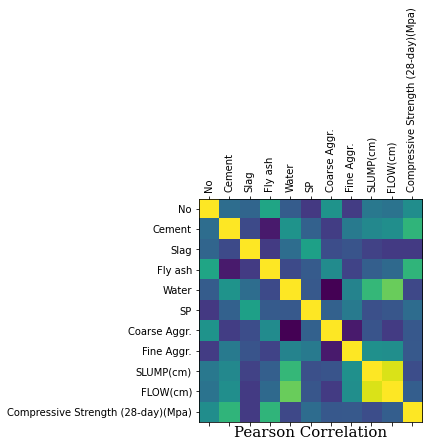

,No,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
No,1.000000,-0.031628,-0.079806,0.340834,-0.138476,-0.334644,0.222075,-0.314376,0.037385,0.008659,0.186274
Cement,-0.031628,1.000000,-0.243553,-0.486535,0.221091,-0.106387,-0.309857,0.056959,0.145913,0.186461,0.445725
Slag,-0.079806,-0.243553,1.000000,-0.322619,-0.026775,0.306504,-0.223792,-0.183522,-0.284037,-0.327231,-0.331588
Fly ash,0.340834,-0.486535,-0.322619,1.000000,-0.241321,-0.143508,0.172620,-0.282854,-0.118621,-0.055423,0.444393
Water,-0.138476,0.221091,-0.026775,-0.241321,1.000000,-0.155456,-0.602201,0.114591,0.466568,0.632026,-0.254235
SP,-0.334644,-0.106387,0.306504,-0.143508,-0.155456,1.000000,-0.104159,0.058290,-0.212902,-0.176314,-0.037871
Coarse Aggr.,0.222075,-0.309857,-0.223792,0.172620,-0.602201,-0.104159,1.000000,-0.488537,-0.188157,-0.325787,-0.160684
Fine Aggr.,-0.314376,0.056959,-0.183522,-0.282854,0.114591,0.058290,-0.488537,1.000000,0.202272,0.190370,-0.154484
SLUMP(cm),0.037385,0.145913,-0.284037,-0.118621,0.466568,-0.212902,-0.188157,0.202272,1.000000,0.906135,-0.223358
FLOW(cm),0.008659,0.186461,-0.327231,-0.055423,0.632026,-0.176314,-0.325787,0.190370,0.906135,1.000000,-0.124029


In [75]:
import matplotlib.pyplot as plt

font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 15,
        }

plt.matshow(data1.corr(method='pearson'))
plt.xticks(range(11), data1.columns.values, rotation='vertical')
plt.yticks(range(11), data1.columns.values)
plt.xlabel('Pearson Correlation', fontdict=font)
plt.show()
data.corr(method='pearson')

we have good correlation between FLOW and SLUMP

Let us start with FLOW.

In [82]:
from sklearn.linear_model import LinearRegression
import numpy as np

model = LinearRegression()

model.fit(X,flow)



LinearRegression()

In [83]:
model = LinearRegression().fit(X, flow)

r_sq = model.score(X, flow)
print('coefficient of determination:', r_sq)



coefficient of determination: 0.5022296725445191


The $R^2$-score is %50

Let us check SLUMP

In [84]:
model = LinearRegression().fit(X, slump)

r_sq = model.score(X, slump)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.32330787970835495


The $R^2$-score is %32

Last part is COMPRESSİON

In [85]:
model = LinearRegression().fit(X, cs)

r_sq = model.score(X, cs)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.8968376098140091


The $R^2$-score increased to 90%.